# Homework4 [Project] 
#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/26 (Tues)  11:59 PM [NO LATE HAND IN(Late hand in will get 0), because of school grade policy]

### In this assignment, you will design, implement, and evaluate the appropriate models for given data.
- __This is project assignment. We can not reply your questions about technical(code) issues.__
- __이번 과제는 프로젝트 과제입니다. 소스코드와 같은 기술적인 질문에는 답변 드릴 수 없습니다.__

<br>
<br>
*Perform the steps described below for each dataset(2 Project).*
>0. Preprocess; normalization, feature selection, etc.
>1. Model selection; characteristics of datasets need to be comprehended.
>2. Evaluation; This step should be done properly to prevent overfitting problem.
>3. Enhancement; parameter tuning and feature selection, etc.

### When you make your model for this Project, you should use scikit learn. Don't use other ML package.
### Of course you can use any packages for handling your data. (pandas, numpy, matplotlib, random etc.)
### Download your data in *https://www.dropbox.com/sh/6s4e0z9fhenfw6z/AADkJO3Z6WN1b8IJhkVp9KgDa?dl=0*

## Project 1
### h1b data [h1b_train, h1b_dev, h1b_test]

- Use h1b __train data__ for train your model.
- Tune your model with __dev data__.
- Finally check your best performed model score with __test data__.
- __*You should clean your train dev test data first!!*__
- Score function : Accuracy
<br>
<br>
- __Your goal is to predict CASE_STATUS, using other features.__
- You can choose the features you want to use in your project.

### Attribute Information

- __CASE_STATUS__
    - The CASE_STATUS field denotes the status of the application after LCA processing. Certified applications are filed with USCIS for H-1B approval.
<br>
<br>
- EMPLOYER_NAME
    - Name of the employer submitting labor condition application.
<br>
<br>
- SOC_NAME
    - Occupational name associated with the SOC_CODE. SOC_CODE is the occupational code associated with the job being requested for temporary labor condition, as classified by the Standard Occupational Classification (SOC) System.
<br>
<br>
- JOB_TITLE
    - Title of the job.
<br>
<br>
- FULL_TIME_POSITION
    - Y = Full Time Position; N = Part Time Position.
<br>
<br>
- PREVAILING_WAGE
    - Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position.
<br>
<br>
- YEAR
    - Year in which the H-1B visa petition was filed.
<br>
<br>

In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
## Preprocessing CV/Test data before applying to Machine Learning Models

먼저 train, dev, test 데이터를 모두 하나로 합친다음 one-hot-encoding을 적용하고, 다시 랜덤 없이 원래 데이터(3:1:1) 비율대로 나눠 머신러닝을 적용하겠습니다. 모든 데이터를 따로 one-hot-encoding을 한다면 column 개수가 달라지기 때문에, 추후 머신러닝을 적용할 때 에러가 발생하기 때문입니다. 

In [2]:
df1 = pd.read_csv('h1b_train.csv')
df2 = pd.read_csv('h1b_dev.csv')
df3 = pd.read_csv('h1b_test.csv')
print('Size of data(Train, Dev, Test): ', df1.shape, df2.shape, df3.shape)

df = pd.concat([df1, df2, df3], axis=0)
print('Size of data after merge: ', df.shape)
display(df.head(10))

Size of data(Train, Dev, Test):  (1802458, 11) (600000, 11) (600000, 11)
Size of data after merge:  (3002458, 11)


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1349742,CERTIFIED,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
1,789205,CERTIFIED,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,Y,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
2,1617140,CERTIFIED,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,Y,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180
3,2757905,CERTIFIED,"CPO SERVICES, INC.",Orthotists and Prosthetists,STAFF PROSTHETIST,Y,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649
4,1127948,WITHDRAWN,VALUE SOFTWARE PRODUCTS INC,COMPUTER SYSTEMS ANALYSTS,SOLUTIONS ARCHITECT,Y,71614.0,2015.0,"MANASSAS, VIRGINIA",-77.475267,38.750949
5,693102,DENIED,"UNIVERSITY OF CALIFORNIA, SAN DIEGO","MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",ASSISTANT PROJECT SCIENTIST,Y,42120.0,2015.0,"LA JOLLA, CALIFORNIA",-117.271272,32.832811
6,2662510,CERTIFIED,GOOGLE INC.,"Computer Software Engineers, Applications",SOFTWARE ENGINEER,Y,82035.0,2011.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052
7,636434,CERTIFIED,"COMPREHAB, INC.",PHYSICAL THERAPISTS,PHYSICAL THERAPIST,N,64168.0,2016.0,"GASTONIA, NORTH CAROLINA",-81.187301,35.262082
8,2265757,CERTIFIED,JPMORGAN CHASE AND CO.,"Software Developers, Applications",APPLICATIONS DEVELOPER,Y,92726.0,2012.0,"COLUMBUS, OHIO",-82.998794,39.961176
9,2927315,CERTIFIED,"IRONBRIDGE CONSULTING, LLC","Information Security Analysts, Web Developers,...",SOFTWARE ENGINEER/ NETWORK ANALYST,Y,57866.0,2011.0,"ARLINGTON, VIRGINIA",-77.106770,38.879970


## Data Cleaning and Feature Selection
우선 데이터를 머신러닝에 적용하기 전, 가장 먼저 missing value가 있는지 알아보겠습니다.

In [3]:
# See if there is NaN values in this Dataframe
print("NaN values in each columns: \n",df.isnull().sum())

NaN values in each columns: 
 Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64


각 특성별 missing value는 물론 훈련 데이터셋의 전체 크기인 300만개에 비하면 충분히 작습니다. 그런데 frequent value로 impute할 경우, PREVAILING_WAGE 등 특성이 왜곡될 염려가 있습니다. 그래서 missing value를 지우겠습니다. 여기서 missing value는 NaN이 아닌, 'NA'로 표기되어있다는 것이 특징입니다.

**우선 missing value를 impute하기 전, 모델 예측에 불필요한 특성이 있는지 살펴보겠습니다.**
1. 첫번째 column인 'Unnamed: 0'는 해당 인물의 ID를 나타낸 숫자입니다. 이는 예측과 아무런 관련이 없으므로, 삭제하겠습니다.
2. JOB_TITLE은 SOC_NAME과 중복되는 정보이므로 삭제합니다. 실제 위 DataFrame을 보면, JOB_TITLE에는 같은 직종이 다르게 표기되어 있는 경우가 많지만 SOC_NAME은 이를 정확한 직종으로 표기하고 있습니다.
3. YEAR도 삭제합니다. 이 프로젝트의 목적은 미래 비자 신청자의 H-1B 비자 발급을 예측하는 것으로, 과거 연도(2011~2016년)와는 상관이 없기 때문입니다.
4. lon과 lat 또한 삭제했습니다. WORKSITE(사업장)의 경도와 위도를 나타낸 것인데, WORKSITE와 중복될 뿐만 아니라, 위도와 경도보다는 지역이 분류 모델에 있어서 더 의미있는 특성이라고 판단했기 때문입니다.


In [4]:
# Drop 'Unnamed:0', 'JOB_TITLE', 'YEAR', 'lon', 'lat', missing values from columns and change target names
visa = df.drop(df.columns[[0, 4, 7, 9, 10]], axis=1).dropna()

print('Sum of missing values:\n', visa.isnull().sum())
print('\nsize of adult dataset after imputation: ', visa.shape)
display(visa.head())

Sum of missing values:
 CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
WORKSITE              0
dtype: int64

size of adult dataset after imputation:  (2984618, 6)


,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
0,CERTIFIED,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,Y,61589.0,"SUNNYVALE, CALIFORNIA"
1,CERTIFIED,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,Y,79144.0,"SAN FRANCISCO, CALIFORNIA"
2,CERTIFIED,WIPRO LIMITED,"Computer Occupations, All Other",Y,73882.0,"EL SEGUNDO, CALIFORNIA"
3,CERTIFIED,"CPO SERVICES, INC.",Orthotists and Prosthetists,Y,61589.0,"PEORIA, ILLINOIS"
4,WITHDRAWN,VALUE SOFTWARE PRODUCTS INC,COMPUTER SYSTEMS ANALYSTS,Y,71614.0,"MANASSAS, VIRGINIA"


In [5]:
print(visa['CASE_STATUS'].unique())
print('\nBefore cleaning target label: \n', pd.value_counts(visa['CASE_STATUS'].values, sort=False))

['CERTIFIED' 'WITHDRAWN' 'DENIED' 'CERTIFIED-WITHDRAWN'
 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' 'REJECTED'
 'INVALIDATED']

Before cleaning target label: 
 DENIED                                                  93764
REJECTED                                                    2
INVALIDATED                                                 1
CERTIFIED                                             2600243
WITHDRAWN                                               89114
CERTIFIED-WITHDRAWN                                    201479
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
dtype: int64


다음으로 주목해야 해야 할 특징은 우리가 예측하고자 하는 'CASE_STATUS'입니다. 총 7개의 'CERTIFIED', 'CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'DENIED', INVALIDATED, 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'REJECTED' label을 포함하고 있는데, Withdrawn이라는 의미를 파악할 필요가 있습니다. 미국 H-1B 발급 절차 상 Certified-Withdrawn은 비자 승인이 났지만 고용주가 나중에 취소한 경우고, Withdrawn은 비자 승인 전 고용주가 취소한 경우를 뜻합니다. 그런데 상식적으로 비자 발급을 예측할 때 고용주가 취소하는 경우는 고려하지 않습니다. **따라서 Certified-Withdrawn을 Certified로 취급하고, Withdrawn은 삭제하겠습니다. 그리고 Certified는 1로, Denied는 0으로 취급하겠습니다.** 

또한 REJECTED와 INVALIDATED는 DENIED로 바꾸고, PENDING QUALITY AND COMPLIANCE REVEW-UNASSIGNED는 삭제하겠습니다.

이 외에도 SOC_NAME의 값을 보면 대문자와 소문자가 혼재되어 쓰여있는 것을 알 수 있습니다. 따라서 모든 해당 열의 모든 값을 대문자로 바꾸겠습니다.

In [6]:
# Clean Target Labels
visa.CASE_STATUS = visa.CASE_STATUS.map({'CERTIFIED-WITHDRAWN':1, 'CERTIFIED':1, 'REJECTED':0, 'DENIED':0,
                                                      'WITHDRAWN':2, 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED':2,
                                                      'INVALIDATED':0})
visa_cleaned = visa[visa.CASE_STATUS != 2]
print('Target labels after cleaning: \n', pd.value_counts(visa_cleaned['CASE_STATUS'].values, sort=False))

Target labels after cleaning: 
 0      93767
1    2801722
dtype: int64


In [7]:
# Apply uppercase to column 'SOC_NAME'
pd.options.mode.chained_assignment = None  # default='warn'

visa_cleaned['SOC_NAME'] = visa_cleaned['SOC_NAME'].str.upper()
print('Size of data after label cleaning: ', visa_cleaned.shape)
display(visa_cleaned.head())

Size of data after label cleaning:  (2895489, 6)


,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
0,1,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",COMPUTER PROGRAMMERS,Y,61589.0,"SUNNYVALE, CALIFORNIA"
1,1,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,Y,79144.0,"SAN FRANCISCO, CALIFORNIA"
2,1,WIPRO LIMITED,"COMPUTER OCCUPATIONS, ALL OTHER",Y,73882.0,"EL SEGUNDO, CALIFORNIA"
3,1,"CPO SERVICES, INC.",ORTHOTISTS AND PROSTHETISTS,Y,61589.0,"PEORIA, ILLINOIS"
5,0,"UNIVERSITY OF CALIFORNIA, SAN DIEGO","MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",Y,42120.0,"LA JOLLA, CALIFORNIA"


다음으로는 비자 발급에 있어서 어떤 직업, 어떤 기업, 어떤 근무지가 제일 많은지 각각 상위 20개씩을 정렬하여 나타내었습니다.

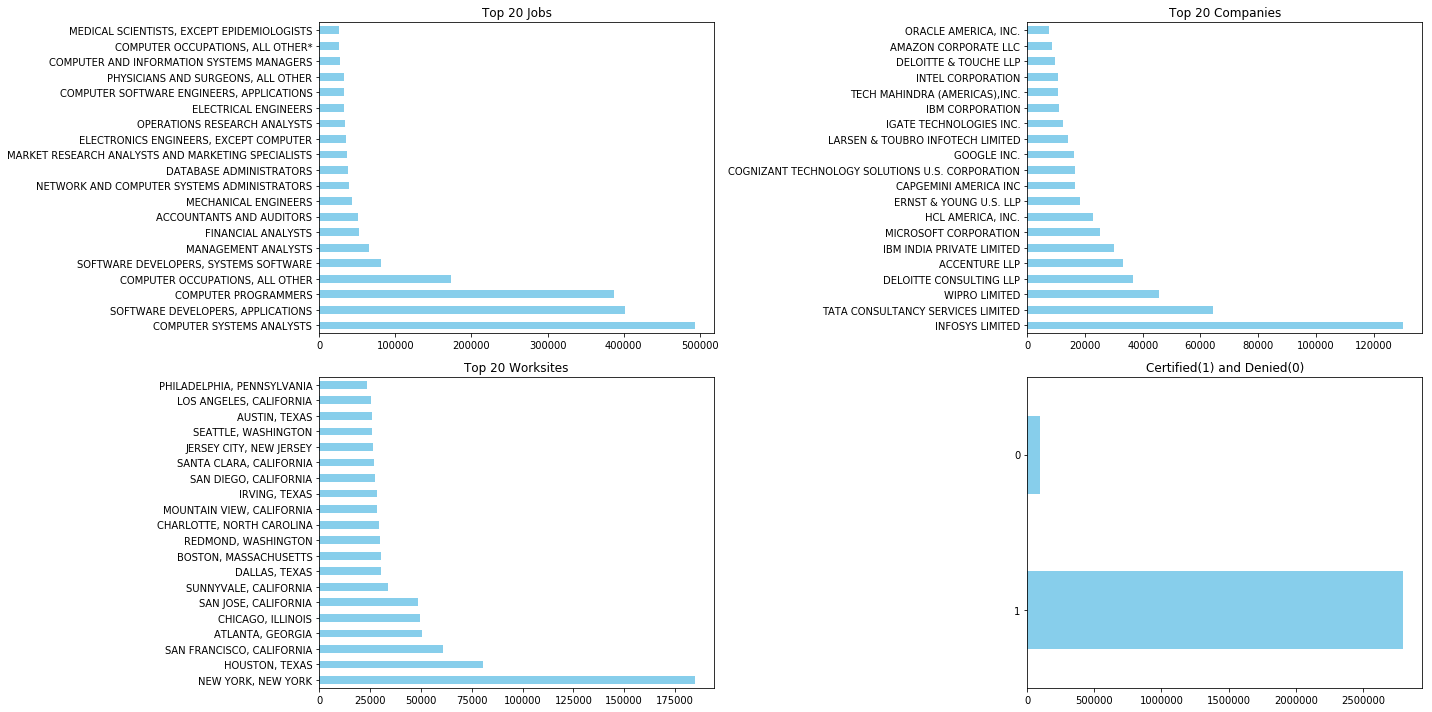

In [8]:
#looking at top 20 SOC_NAME, EMPLOYER_NAME, WORKSITE, CERTIFIED-DENED
# Plot the corresponding bar plots in a subplot
plt.figure(figsize=(20, 10))

# Top job names
plt.subplot(2, 2, 1)
visa_cleaned['SOC_NAME'].value_counts().nlargest(20).plot(kind="barh",color='skyblue')
plt.title('Top 20 Jobs')

# Top employers
plt.subplot(2, 2, 2)
visa_cleaned['EMPLOYER_NAME'].value_counts().nlargest(20).plot(kind="barh", color='skyblue')
plt.title('Top 20 Companies')

# Top worksites
plt.subplot(2, 2, 3)
visa_cleaned['WORKSITE'].value_counts().nlargest(20).plot(kind="barh",color='skyblue')
plt.title('Top 20 Worksites')

# number of Certified&Denied
plt.subplot(2, 2, 4)
visa_cleaned['CASE_STATUS'].value_counts().plot(kind="barh",color='skyblue')
plt.title('Certified(1) and Denied(0)')

plt.tight_layout()
plt.show()

In [9]:
counts = visa_cleaned['CASE_STATUS'].value_counts().tolist()
print('Certified accounts for {:.2f}% of the CASE_STATUS class'.format(counts[0] / len(visa_cleaned['CASE_STATUS']) * 100))
print('Denied accounts for {:.2f}% of the CASE_STATUS class'.format(counts[1] / len(visa_cleaned['CASE_STATUS']) * 100))

Certified accounts for 96.76% of the CASE_STATUS class
Denied accounts for 3.24% of the CASE_STATUS class


## Encoding Categorical Values
adult 데이터의 범주형 데이터를 기계학습에서 처리하기 위해서는, 범주형 데이터를 숫자로 바꾸는 작업이 필요합니다. 여기에서는 Scikit-learn의 LabelEncoder와 OneHotEncoder 클래스를 이용한 One-Hot-Encoding을 사용하겠습니다.

In [10]:
label_encoder = preprocessing.LabelEncoder()
visa_le = visa_cleaned.apply(label_encoder.fit_transform)
display(visa_le.head())

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
0,1,104052,295,1,17929,15919
1,1,85330,1050,1,27380,14136
2,1,228570,278,1,24573,5113
3,1,50796,1106,1,17929,12459
5,0,217367,993,1,7285,8424


### Visualize Correlations between features

특성들 간의 상관지수를 Seaborn 라이브러리를 이용해 표현해 보았습니다. FULL_TIME_POSITION과 PREVALING_WAGE, 그리고 SOC_NAME 특성이 다른 변수들보다 강한 양의 상관관계를 지니고 있음을 확인할 수 있었습니다.

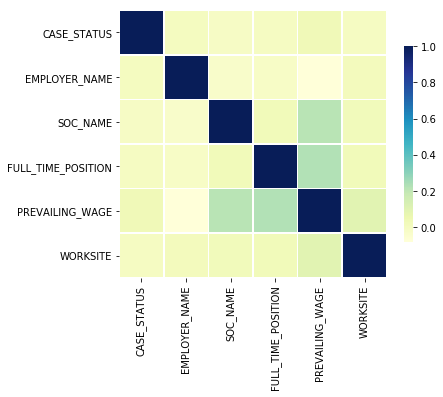

In [11]:
corr = visa_le.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(corr,square=True, cmap="YlGnBu", xticklabels=True, yticklabels=True, linewidths=.6, cbar_kws={"shrink": .6}, ax=ax)

## One-Hot Encoding
**LabelEncoder의 결과값을 그대로 분류기에 넣는다면 문제가 발생합니다.** 예를 들어 'SOC_NAME'의 class는 'COMPUTER SYSTEMS ANALYSTS
', 'DENTISTS, GENERAL'와 같은, 우열을 가릴 수 없는 동등한 범주입니다. 그러나 이를 숫자로 바꾸면 분류기는 한 class가 다른 class보다 크다고 인식하므로 분류 상의 정확도가 떨어지게 됩니다. 그래서 One-Hot Encoding 과정이 필요합니다. One-Hot-Encoding은 범주형 변수를 '가변수(dummy variable)'라는 0과 1의 값을 가진 새로운 특성을 만들어내어 이러한 오류를 방지합니다.

In [12]:
# OneHotEncoder(Scikit-learn)
y = visa_le.iloc[:, visa_le.columns == 'CASE_STATUS']
le_feature = visa_le.iloc[:, visa_le.columns != 'CASE_STATUS']
# select categorical features
categories = ['EMPLOYER_NAME', 'SOC_NAME', 'PREVAILING_WAGE', 'WORKSITE']
visa_data = le_feature.values

# find index of categorical features
categories_idx = []
for str in categories:
    categories_idx.append(le_feature.columns.tolist().index(str))

OH_encoder = preprocessing.OneHotEncoder(categorical_features = categories_idx, sparse=True, dtype=np.int8)
X = OH_encoder.fit_transform(visa_data)
X

<2895489x308905 sparse matrix of type '<class 'numpy.float64'>'
	with 14066012 stored elements in COOrdinate format>

# Model Selection & Evaluation

In [63]:
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.linear_model import Lasso                 #LASSO Regression
from sklearn.ensemble import GradientBoostingClassifier#Gradient Boosting Classifier
from sklearn.svm import SVC                            #SVM

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
import sklearn.metrics as metrics

In [46]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_trainval, y_trainval, test_size=0.25, shuffle=False, random_state=42)
print(X_train.shape, X_dev.shape, X_test.shape)

(1737293, 308905) (579098, 308905) (579098, 308905)


## Let's Handle Huge Class Imbalance
지금까지 Train, Dev, Test 데이터를 one-hot-encoding하고 원래 순서와 배열대로 나누는 작업을 진행했습니다. **그러나 Train데이터를 학습하기 앞서 해야 할 것이 있습니다. 바로 balanced class를 만드는 것입니다.**

현재 96%의 비자 발급 데이터가 승인, 즉 1인 상태입니다. 이는 무조건 승인받는다고 예측해도 96.76%의 정확도를 보인다는 것이므로, 불균형을 해결해주어야만 합니다. 이를 위해 먼저 Traning Data에 down/up sampling을 실시하겠습니다. **replacement 없이** Majority Class의 Down-sample을 진행하고, **replacement 있이** Minority Class의 Up-sample을 진행하며, 최종적으로 승인과 거절의 데이터 비율을 1:1로 조절하겠습니다. 이렇게 처리된 후 Train 데이터는 약 22만개가 될 것입니다.

In [47]:
zeros = []
ones = []
for i in range(y_train.shape[0]):
    if (y_train.CASE_STATUS.values[i] == 0):
        zeros.append(i)
    else:
        ones.append(i)

In [48]:
len(zeros), len(ones)

(56213, 1681080)

In [49]:
from scipy.sparse import vstack
from sklearn.utils import resample
# Seperate majority and minority classes
visa_min = X_train[zeros]
visa_maj = X_train[ones]
y_min = y_train[y_train['CASE_STATUS']==0]
y_maj = y_train[y_train['CASE_STATUS']==1]

print(visa_maj.shape, visa_min.shape, y_maj.shape, y_min.shape) 
# Downsample majority class
visa_maj_downsampled = resample(visa_maj, replace=False, n_samples=visa_min.shape[0] * 2, random_state=42)
visa_downsampled = vstack([visa_maj_downsampled, visa_min])

y_maj_downsampled = resample(y_maj, replace=False, n_samples=y_min.shape[0] * 2, random_state=42)
y_downsampled = pd.concat([y_maj_downsampled, y_min])

# Up-sample minority class
visa_min_upsampled = resample(visa_min, replace=True, n_samples=visa_min.shape[0], random_state=42)
visa_sampled = vstack([visa_downsampled, visa_min_upsampled])

y_min_upsampled = resample(y_min, replace=False, n_samples=y_min.shape[0], random_state=42)
y_sampled = pd.concat([y_downsampled, y_min_upsampled])

# Display value counts of downsampled data
print(visa_sampled.shape, y_sampled.shape)

X_train = visa_sampled
y_train = y_sampled

(1681080, 308905) (56213, 308905) (1681080, 1) (56213, 1)
(224852, 308905) (224852, 1)


그런데 이대로 학습하면 train데이터보다 dev와 test 데이터가 각각 약 3배정도 많은 현상이 발생하게 됩니다. Train 데이터가 22만개이므로, 60:20:20 비율을 맞추기 위해 Dev와 Test데이터를 train의 1/3인 7만개 정도로 맞춰 줍니다.

In [50]:
X_dev = resample(X_dev, replace=False, n_samples=int(X_train.shape[0]/3), random_state=42) 
y_dev = resample(y_dev, replace=False, n_samples=int(X_train.shape[0]/3), random_state=42) 

X_test = resample(X_test, replace=False, n_samples=int(X_train.shape[0]/3), random_state=42) 
y_test = resample(y_test, replace=False, n_samples=int(X_train.shape[0]/3), random_state=42)

print(X_dev.shape, X_test.shape)

(74950, 308905) (74950, 308905)


In [51]:
# Clean y values to avoid future warning messages
# for 'ravel()', refer to 'https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html'.
y_train = y_train.values.ravel()
y_dev = y_test.values.ravel()
y_test = y_test.values.ravel()
y_trainval = y_trainval.values.ravel()

### Logistic Regression

로지스틱 회귀는 거대한 희소행렬에 괜찮은 성능을 보여주는 분류기입니다. 우선 희소행렬에 적합한 solver인 'sag' 조건만 두고 학습시켜 보겠습니다.

In [52]:
#----------------Logistic Regression
lr = LogisticRegression(random_state=0, solver='sag', n_jobs=-1)
lr.fit(X_train, y_train)

print('======== Logistic Regression Classifier Result ========')
print('Train data accuracy: {:.3f}%'.format(lr.score(X_train, y_train)*100))
print('CV data accuracy: {:.3f}%'.format(lr.score(X_dev, y_dev)*100))
print('<<Classification Result(Train Data)>>\n', classification_report(y_train, lr.predict(X_train)))
print('<<Classification Result(Dev Data)>>\n', classification_report(y_dev, lr.predict(X_dev)))

======== Logistic Regression Classifier Result ========
Train data accuracy: 86.294%
CV data accuracy: 74.209%
<<Classification Result(Train Data)>>
              precision    recall  f1-score   support

          0       0.86      0.86      0.86    112426
          1       0.86      0.87      0.86    112426

avg / total       0.86      0.86      0.86    224852

<<Classification Result(Dev Data)>>
              precision    recall  f1-score   support

          0       0.03      0.25      0.06      2473
          1       0.97      0.76      0.85     72477

avg / total       0.94      0.74      0.82     74950



Train데이터의 Classification 결과를 보면, 0과 1이 각각 11만개인데 두 클래스 모두 잘 예측하고 있음을 확인할 수 있습니다. 반면 따로 균형 샘플링되지 않은 dev 데이터의 경우, 0 class에 대한 여러 수치가 떨어지고, 특히 recall에서 저조한 현상을 보이고 있습니다. 그러므로 우선 더 좋은 성능을 도출하기 위해 'C'와 같은 로지스틱 회귀의 hyperparameter를 GridSearchCV를 사용해 조절하겠습니다.

In [54]:
param_lr = {'C': [0.1, 0.3, 1, 3, 10]}

# Select Best parameter using GridSearchCV and 2-fold Cross Validation
lr_grid = GridSearchCV(lr, param_lr, cv=2, return_train_score=True)
lr_grid.fit(X_train, y_train)

print('======== Logistic Regression Classifier Result ========')
print('Train set accuracy: {:.3f}%'.format(lr_grid.score(X_train, y_train)*100))
print('Best Parameter: {}'.format(lr_grid.best_params_))
print('<<Classification Result(Dev Data)>>\n', classification_report(y_dev, lr_grid.predict(X_dev)))

======== Logistic Regression Classifier Result ========
Train set accuracy: 91.333%
Best Parameter: {'C': 10, 'max_iter': 100}
<<Classification Result(Dev Data)>>
              precision    recall  f1-score   support

          0       0.03      0.23      0.06      2473
          1       0.97      0.78      0.86     72477

avg / total       0.94      0.76      0.84     74950



hyperparameter를 조정함으로서 약간 좋아진 것을 확인할 수 있었으나, 아직 미비합니다. 위 GridSearchCV에서 나온 최고의 hyperparameter를 바탕으로, 로지스틱 회귀 모델을 Test 데이터에 적용해 보겠습니다.

In [58]:
lr = LogisticRegression(C=10, random_state=0, solver='sag', n_jobs=-1)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Test set accuracy: {:.3f}%'.format(accuracy*100))

Test set accuracy: 78.692%


# Enhancement

### Gradient Boosting Regression Tree
그래디언트 부스팅 회귀 트리는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 앙상블 방법입니다. 이름은 회귀이지만 회귀와 분류 모두에 사용할 수 있습니다. 이전 트리의 오차를 보완하는 'Boosting'기법과 강력한 사전 가지치기가 쓰여 메모리를 적게 사용하고 예측도 빠릅니다. 방금 전 로지스틱 회귀에서는 0 class를 제대로 분류하지 못했으므로, 그래디언트 부스팅 회귀 트리로 0 학습을 강화시켜 주는 것이 도움이 되리라 판단했습니다.

In [59]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0, n_estimators=500)

gbrt.fit(X_train, y_train)

print('======== Logistic Regression Classifier Result ========')
print('Train data accuracy: {:.3f}%'.format(gbrt.score(X_train, y_train)*100))
print('CV data accuracy: {:.3f}%'.format(gbrt.score(X_dev, y_dev)*100))
print('<<Classification Result(Train Data)>>\n', classification_report(y_train, gbrt.predict(X_train)))
print('<<Classification Result(Dev Data)>>\n', classification_report(y_dev, gbrt.predict(X_dev)))

======== Logistic Regression Classifier Result ========
Train data accuracy: 65.525%
CV data accuracy: 53.474%
<<Classification Result(Train Data)>>
              precision    recall  f1-score   support

          0       0.63      0.76      0.69    112426
          1       0.70      0.55      0.61    112426

avg / total       0.66      0.66      0.65    224852

<<Classification Result(Dev Data)>>
              precision    recall  f1-score   support

          0       0.03      0.46      0.06      2473
          1       0.97      0.54      0.69     72477

avg / total       0.94      0.53      0.67     74950



그러나 약 1시간여 학습시킨 결과, 위와 같이 전체적으로 낮게 나왔습니다. 이는 그래디언트 부스트 회귀 트리가 희소행렬형 데이터에 취약하기 때문이라고 보여집니다. 그래디언트 부스트 회귀 트리는 우리가 갖고 있는 데이터에 대해서는 잘 동작하지 않는 것을 확인할 수 있었습니다. 앞으로 기회가 있다면 더 많은 분류기를 학습시켜 그 성능을 비교 분석하고 싶습니다.

## Project 2
### AAAI Accepted Papers

- Cluster papers using AAAI Accepted Papers data [use __'title'__ as primary key].
- Visualize your clustering result and explain it.
<br>
<br>
- __Your goal is to show clustering result with AAAI Accepted Papers.__
- __You must use 'abstract' feature.__ 
- You can choose the features you want to use in your project.

### Attribute Information

- __Title__
    - Free text; title of the paper 
<br>
<br>
- Groups
    - Categorical; author-selected, high-level keyword(s) 
<br>
<br>
- Keywords
    - Free text; author-generated keywords 
<br>
<br>
- Topics
    - Free text; author-selected, low-level keywords 
<br>
<br>
- __Abstracts__
    - Free text; paper abstracts

# Preprocessing
먼저 데이터를 클러스터링하기 위해, 각 특성의 값들이 어떤 특징을 갖고 있는지 살펴보겠습니다.

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#import data
papers = pd.read_csv('AAAI_Accepted_Papers.csv', encoding = "ISO-8859-1")
print('Size of data: ', papers.shape)
display(papers.head())

Size of data:  (548, 5)


,title,groups,keywords,topics,abstract
0,The cascade auction ??a mechanism for deterrin...,Mediators\nAuctions\nCollusion\nAd Exchanges,Multiagent Systems,Auctions and Market-Based Systems\nE-Commerce\...,We introduce a sealed bid auction of a single ...
1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Machine Learning\nReasoning under Uncertainty,Dimension Reduction/Feature Selection\nOnline ...,This paper presents a new approach to basis ad...
2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory\nCoalition Structure G...,Multiagent Systems,Coordination and Collaboration\nGame Theory,Representation languages for coalitional game...
3,External Memory Best-First Search for Multiple...,External-Memory Search\nParallel Search\nMulti...,Heuristic Search and Optimization,Heuristic Search\nEvaluation and Analysis (Sea...,Multiple sequence alignment (MSA) is a central...
4,Posted Prices Exchange for Display Advertising...,Display Advertising\nDynamic Pricing\nMarket E...,Multiagent Systems,Auctions and Market-Based Systems\nE-Commerce\...,We propose a new market design for display adv...


먼저 abstract를 보면 \n으로 나뉘어 있는 문장이 대다수입니다. 문장의 경우, TFI-DF vectorizer를 사용해 클러스터링 하는 게 효과적입니다. 따라서, 먼저 scikit-learn의 TfidfVectorizer를 사용해 희소행렬을 만들고, 이를 우선 행렬로 변환하겠습니다.

In [66]:
# Deal with column abstract
print("Extracting features from the training dataset using a sparse vectorizer")
tfidf_vectorizer =  TfidfVectorizer(analyzer='word', ngram_range=(1,6),
                                   stop_words='english', min_df = 2, sublinear_tf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(papers.abstract)

tdidf_arr = tfidf_matrix.toarray()
papers.drop('abstract',axis = 1)
papers.abstract = ""
for i in range(len(tdidf_arr)):
    val = (np.where(tdidf_arr==max(tdidf_arr[i])))[-1][0]
    papers.abstract[i] = tfidf_vectorizer.get_feature_names()[val]

Extracting features from the training dataset using a sparse vectorizer


In [67]:
papers.abstract

0                     auction
1                     descent
2                   coalition
3                    external
4                      demand
5                       shape
6      constraint propagation
7                      theory
8                        cake
9                        hash
10          human computation
11                   saliency
12       probabilistic models
13                 random sat
14                      mixed
15                     causal
16                       rank
17                     peaked
18                    vendors
19                    opinion
20                  stability
21               hierarchical
22                 clustering
23             gibbs sampling
24                     reveal
25                        min
26                        map
27                      costs
28                 preference
29                  customers
                ...          
518          graph clustering
519               orientation
520       

또한 group, topics, keywords 특성의 값 모두 '\n'으로 소주제가 분리되어 있기 때문에, 이를 제대로 처리해주는 것이 필요합니다. 그러므로 이 column들도 모두 split을 사용하여 '\n'공백을 기준으로 분리하고, 그 단어들을 리스트로 만들었습니다.

In [68]:
str_g = papers.groups.str.split('\n').apply(pd.Series,1).stack().tolist()
str_t = papers.topics.str.split('\n').apply(pd.Series,1).stack().tolist()
str_k = papers.keywords.str.split('\n').apply(pd.Series,1).stack().tolist()
str_a = papers.abstract.apply(pd.Series,1).stack().tolist()

각 특성 리스트의 길이는 다음과 같습니다.

In [69]:
len(str_g), len(str_t), len(str_k), len(str_a)

(1280, 1610, 1822, 548)

클러스터링을 더 진행하기 위해, 이 리스트들을 우선 attr(attribute)라는 큰 리스트로 병합합니다. 그리고 abstract 특성을 포함한 모든 특성들을 clustering의 feature로 만들었습니다.

그 후, 논문의 feature 포함 여부에 따라 feature값을 1로 할당하였습니다.

In [70]:
# Concatenate lists into one
attr = str_g + str_t + str_k + str_a

data = np.zeros((len(papers),len(attr)))
for i in(range(len(papers))):
    a = papers.groups.str.split('\n').apply(pd.Series,1).stack()[i].tolist()
    b = papers.topics.str.split('\n').apply(pd.Series,1).stack()[i].tolist()
    c = papers.keywords.str.split('\n').apply(pd.Series,1).stack()[i].tolist()
    d = papers.abstract.apply(pd.Series,1).stack()[i].tolist()
    iattr = a + b + c + d
    for j in(range(len(iattr))):
        if iattr[j] in attr:
            data[i,attr.index(iattr[j])] = 1

In [72]:
new_papers = pd.DataFrame(data, columns=attr)
new_papers['titles'] = papers.title
new_papers = new_papers.set_index('titles')

이후, PCA 알고리즘을 통해 이 특성들을 2차원으로 줄였습니다. 그리고 클러스터 값 k를 5로 설정하였습니다. 이 k값은 물론 더욱 크게 조정할 수 있으며, 그에 따라 더 세부적으로 클러스터링 되게 될 것입니다. 

결국, 아래 그림과 같은 클러스터링 결과를 얻을 수 있었습니다. 추후 k값을 변경하여 실험하거나 특성 값을 조정하여 실험해 보겠습니다. 

이 프로젝트는 제 데이터 처리 실력이 많이 성장하는 시간이었습니다. 이런 프로젝트를 주시고 도전하게 해 주셔서 교수님과 조교님께 정말 감사드립니다.

In [73]:
pca = PCA(n_components=2)
components = pca.fit_transform(new_papers)

kmeans = KMeans(n_clusters=5, random_state=42).fit(components)
clusters = kmeans.labels_.tolist()

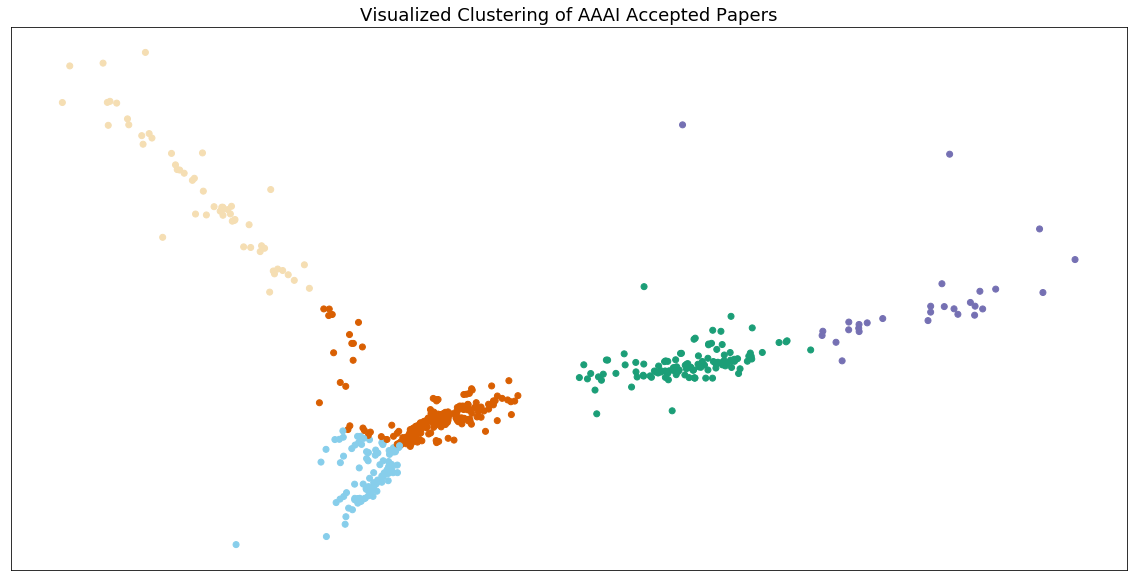

In [81]:
label_colormap = {0:'skyblue', 1:'wheat', 2:'#1b9e77', 3:'#d95f02', 4:'#7570b3'}
label_color = [label_colormap[k] for k in clusters]

f, ax = plt.subplots(figsize=(20, 10))
plt.scatter(components[:,0], components[:,1], c=label_color, marker='o',)
ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
plt.title('Visualized Clustering of AAAI Accepted Papers', size=18)
plt.show()

# FIN
## You did a really good job for the short semester. Have a nice vacation!! :) 